In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## MINI PROJECT - DATA ANALYTICS

> ### OBJECTIVE:
> - To demonstrate practical skills in data preprocessing and descriptive analysis.
>
> ### DATASET:
> - The Melbourne Housing Market dataset, available at [Kaggle - Melbourne Housing](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data).

### BACKGROUND

Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe you can find a trend to this matter? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should you buy a 2 bedroom unit?

### CONTENT & ACKNOWLEDGEMENTS
This data was scraped from publicly available results posted every week from Domain.com.au, it's cleaned, but you should check it properly to make sure the data analysis is valid.

The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

### DATA DICTIONARY AND KEY DETAILS

- **Suburb:** Suburb
- **Address:** Address
- **Rooms:** Number of rooms
- **Price:** Price in Australian dollars

- **Method:**
**S** - property sold;
**SP** - property sold prior;
**PI** - property passed in;
**PN** - sold prior not disclosed;
**SN** - sold not disclosed;
**NB** - no bid;
**VB** - vendor bid;
**W** - withdrawn prior to auction;
**SA** - sold after auction;
**SS** - sold after auction price not disclosed.
**N/A** - price or highest bid not available.

- **Type:**
**br** - bedroom(s);
**h** - house,cottage,villa, semi,terrace;
**u** - unit, duplex;
**t** - townhouse;
**dev site** - development site;
**o res** - other residential.

- **SellerG:** Real Estate Agent
- **Date:** Date sold
- **Distance:** Distance from CBD in Kilometres
- **Regionname:** General Region (West, North West, North, North east …etc)
- **Propertycount:** Number of properties that exist in the suburb.
- **Bedroom2:** Scraped # of Bedrooms (from different source)
- **Bathroom:** Number of Bathrooms
- **Car:** Number of carspots
- **Landsize:** Land Size in Metres
- **BuildingArea:** Building Size in Metres
- **YearBuilt:** Year the house was built
- **CouncilArea:** Governing council for the area
- **Lattitude:** Self explanitory
- **Longtitude:** Self explanitory

# 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure.
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [32]:
# Import Library
# Library
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("/content/drive/MyDrive/My Learning Data/Datset/Melbourne_Housing.csv")

In [34]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


### Number of rows and columns.

In [35]:
# Mendapatkan jumlah baris dan kolom
jumlah_baris, jumlah_kolom = df.shape

print("Jumlah Baris:", jumlah_baris)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Baris: 13580
Jumlah Kolom: 21


In [36]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Data types of each column.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Missing values of each column.

In [38]:
missing_value = df.isnull().sum()
print(missing_value)

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


### Any initial observations or issues you notice (if any).

In [39]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [40]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


# 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

### Suggest a more suitable data type for these columns. and Transform the identified columns to the suggested data types.
1. column date = datetime
2. landsize
3. yearbuilt


In [41]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [42]:
#df['YearBuilt']=df['YearBuilt'].astype(int)

In [43]:
#df['Landsize']=df['Landsize'].astype(float)

In [44]:
#df['Car']=df['Car'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  int64         
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

# 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [46]:
missing_value = df.isnull().sum()
print(missing_value)

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [47]:
# Menghitung persentase nilai yang hilang per kolom
persentase_missing = (df.isnull().mean() * 100).round(2).astype(str) + '%'

# Membuat DataFrame baru untuk menampilkan hasil
summary = pd.DataFrame({
    'missing value' : missing_value,
    'Persentase Missing': persentase_missing
})

print(summary)

               missing value Persentase Missing
Suburb                     0               0.0%
Address                    0               0.0%
Rooms                      0               0.0%
Type                       0               0.0%
Price                      0               0.0%
Method                     0               0.0%
SellerG                    0               0.0%
Date                       0               0.0%
Distance                   0               0.0%
Postcode                   0               0.0%
Bedroom2                   0               0.0%
Bathroom                   0               0.0%
Car                       62              0.46%
Landsize                   0               0.0%
BuildingArea            6450              47.5%
YearBuilt               5375             39.58%
CouncilArea             1369             10.08%
Lattitude                  0               0.0%
Longtitude                 0               0.0%
Regionname                 0            

Identify any columns that have missing values,
1. car
2. build area
3. year build
4. council area

Memisah antara typedata numeric dan categorical

In [48]:
numcols = df.select_dtypes(include=['int', 'float'])
catcols = df.select_dtypes(include=['object'])

In [49]:
numcols.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

Melihat distribusi untuk menentukan imputasi

<ipython-input-50-0582cef466a9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col],kde=True)
<ipython-input-50-0582cef466a9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col],kde=True)
<ipython-input-50-0582cef466a9>:10: UserWarning: 

`distplot` is a deprecated function and w

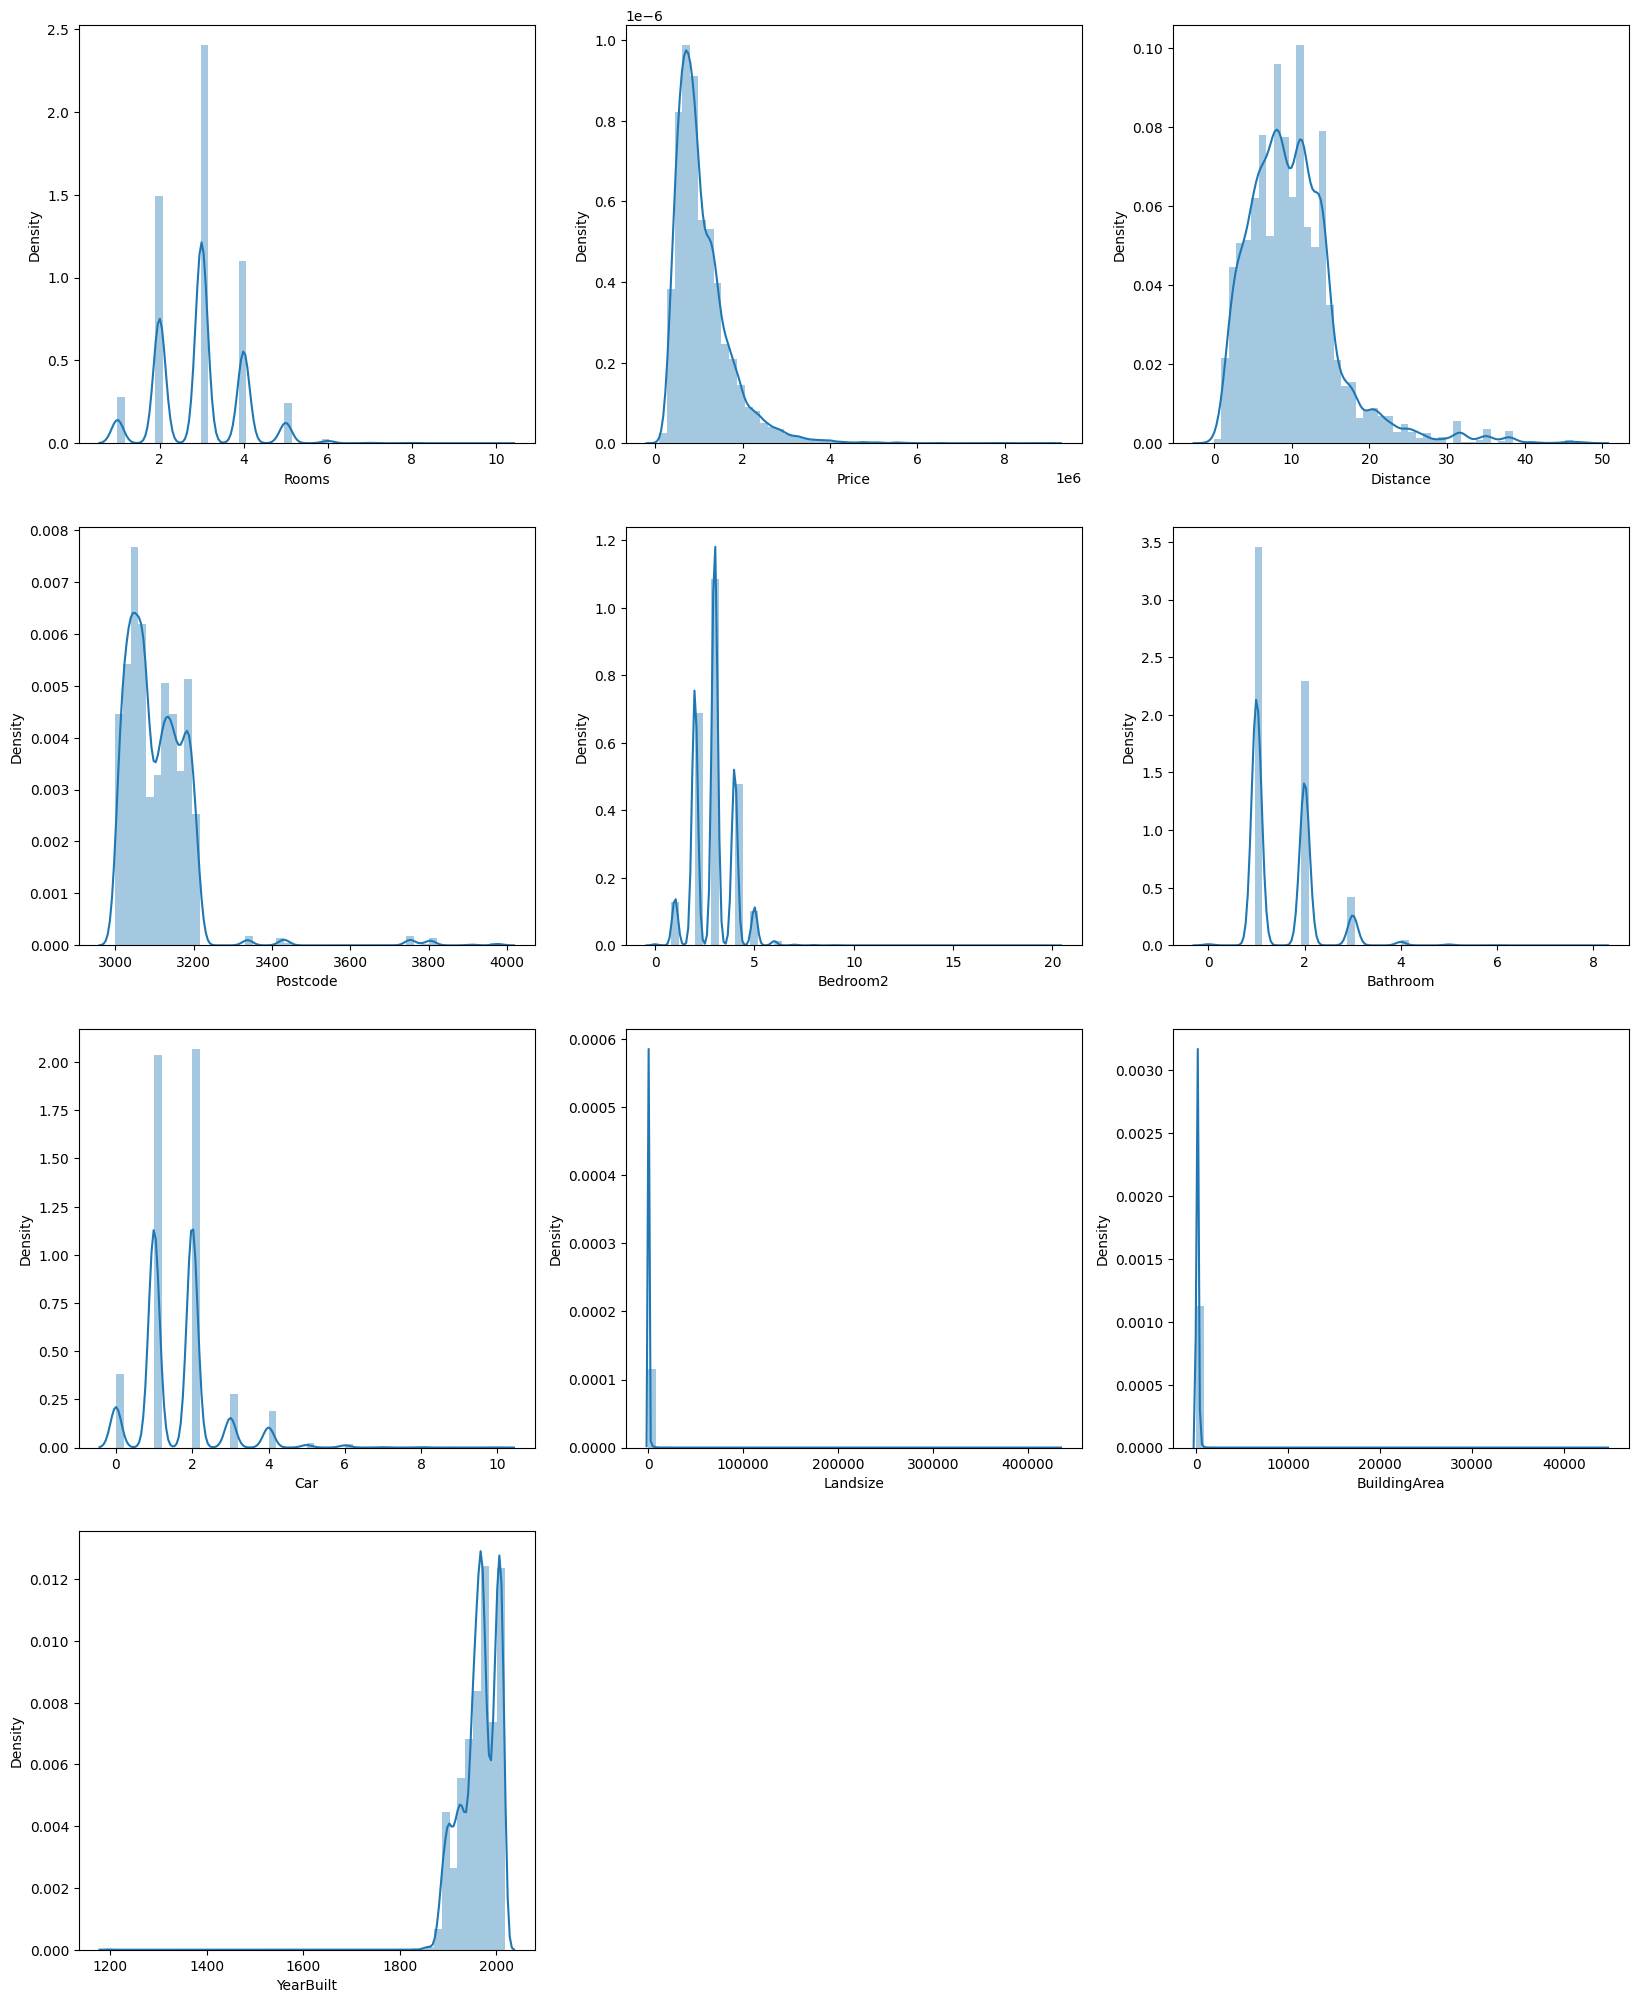

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = numcols.columns
plt.figure(figsize=(20,25))
plotnum = 1
for col in columns:
    if plotnum<11:
        plt.subplot(4,3,plotnum)
        sns.distplot(x=df[col],kde=True)
        plt.xlabel(col)
    plotnum+=1
plt.show()

char condong ke kiri jadi isi dengan median dari
build area condong ke kiri jadi di isi dengan median
yearbuild

### you can also show the number and percentage of missing values.

In [51]:
# mengisi nilai median atau proses imputasi pada column yearbuild dan car
# menghapus column buildingarea karena missing valuenya yang hampir 50% jadi sepertinya kurang efektif kalau menggunakan column ini
df['YearBuilt'].fillna(df['YearBuilt'].median(), inplace=True)
df.drop('BuildingArea', axis=1, inplace=True)
df['Car'].fillna(df['Car'].median(), inplace=True)

Handling CouncilArea karena dia kategorical jadi mungkin kita masukin mode saja

In [52]:
df['CouncilArea'].fillna(df['CouncilArea'].mode().iloc[0], inplace=True)

In [53]:
missing_value = df.isnull().sum()
print(missing_value)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


Ubah type data setelah melakukan handling missing value

In [54]:
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Car']=df['Car'].astype(int)
df['Landsize']=df['Landsize'].astype(float)
df['YearBuilt']=df['YearBuilt'].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  int64         
 13  Landsize       13580 non-null  float64       
 14  YearBuilt      13580 non-null  int64         
 15  CouncilArea    1358

In [56]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2.5,3067,2,1,1,202.0,1970,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067,2,1,0,156.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2.5,3067,3,2,0,134.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2.5,3067,3,2,1,94.0,1970,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,2.5,3067,3,1,2,120.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


# 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers:
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

#### Report these columns and the number of outliers detected.


In [59]:
numcols = df.select_dtypes(include=['int', 'float'])
catcols = df.select_dtypes(include=['object'])

In [60]:
numcols.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')

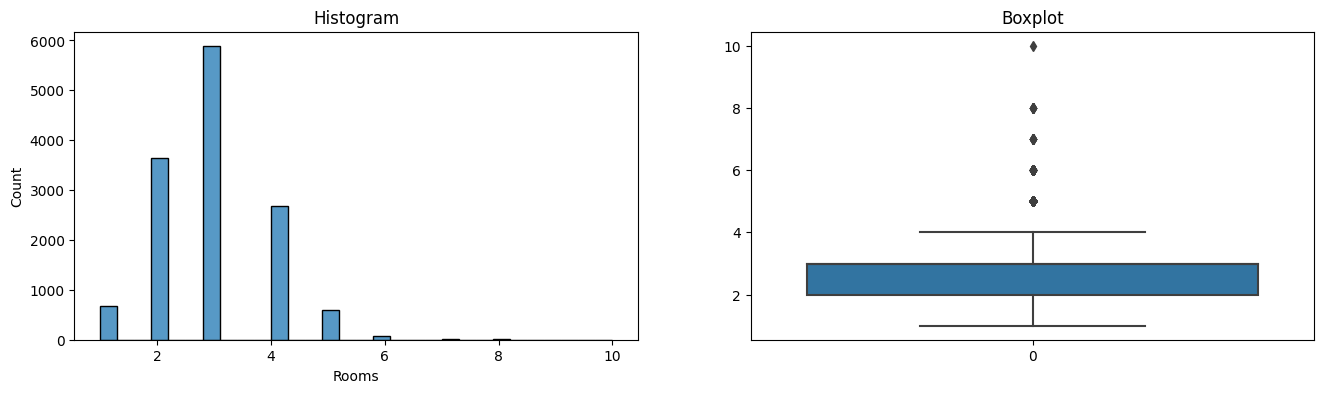

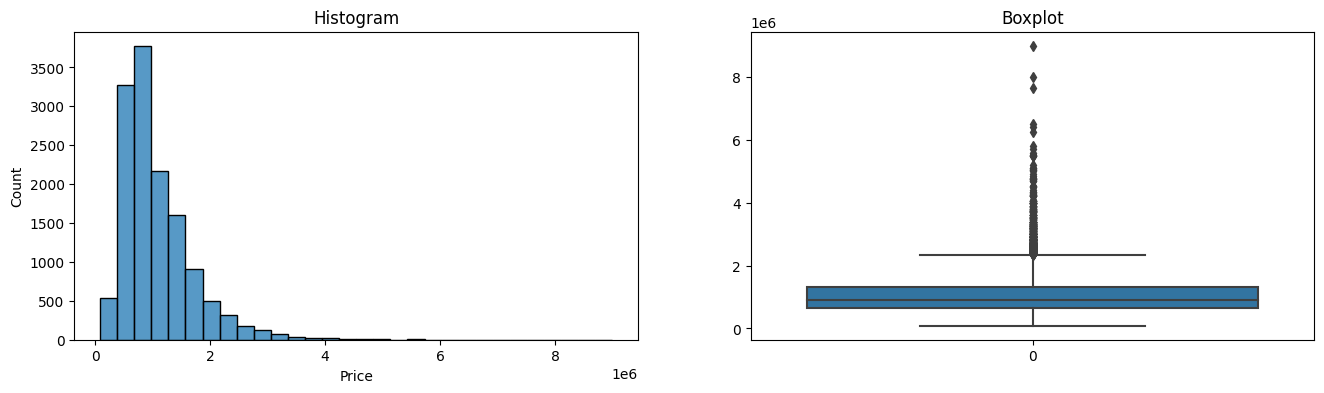

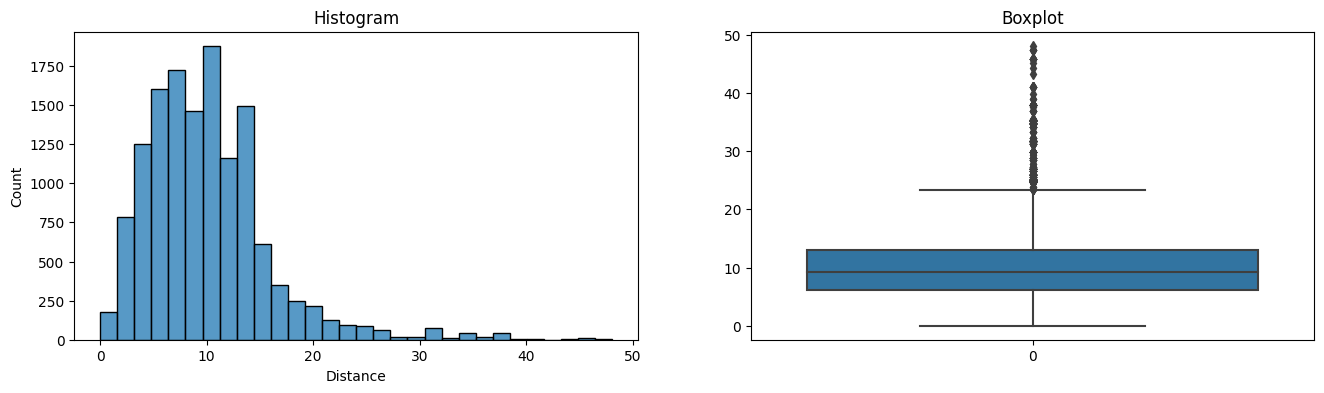

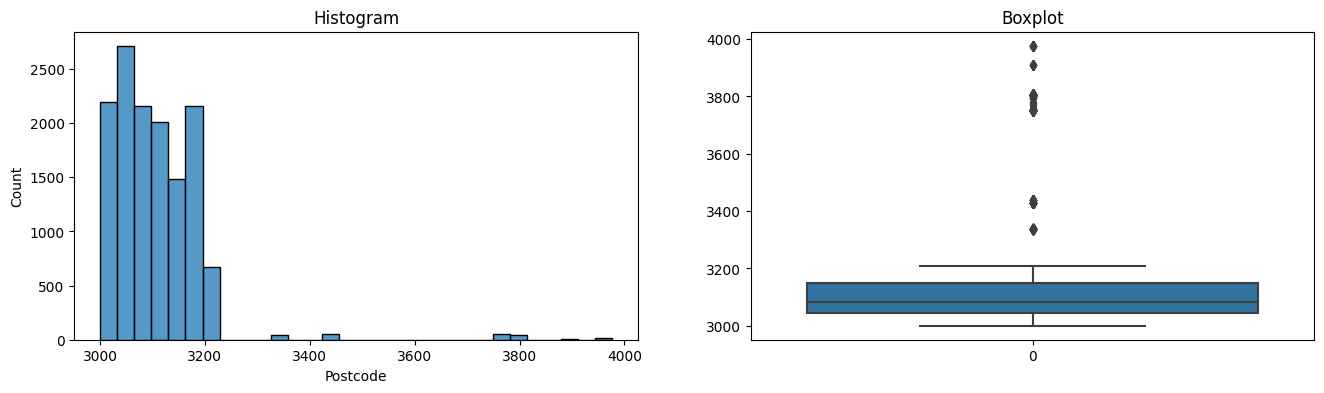

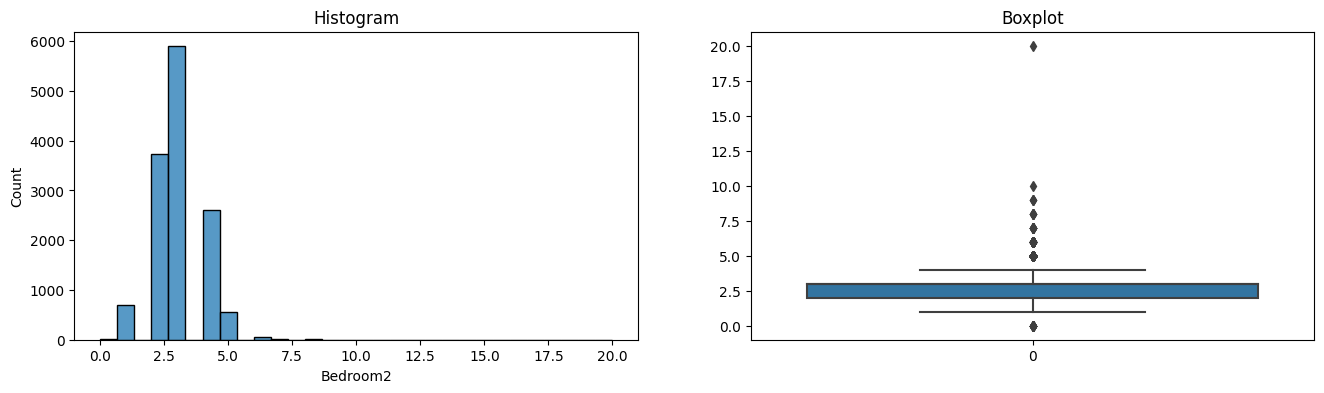

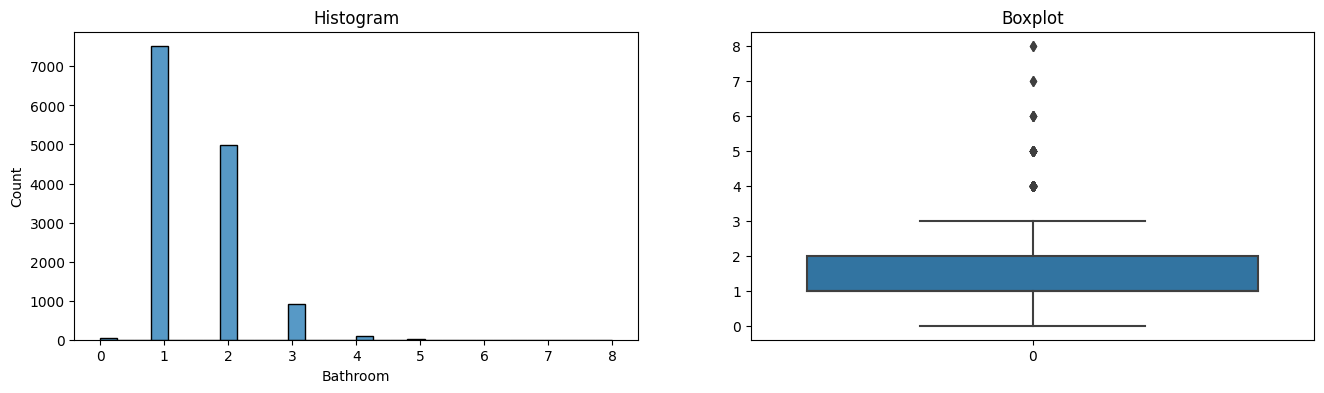

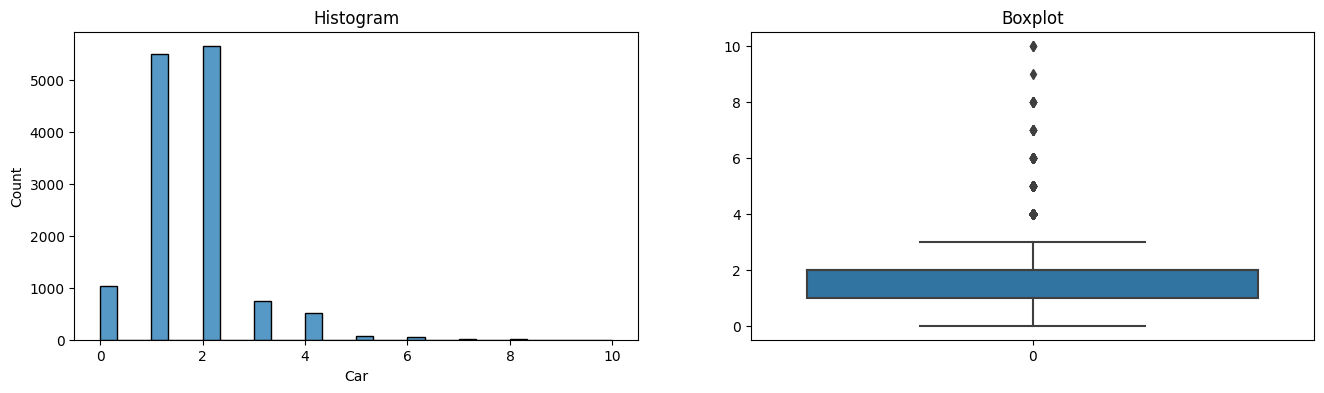

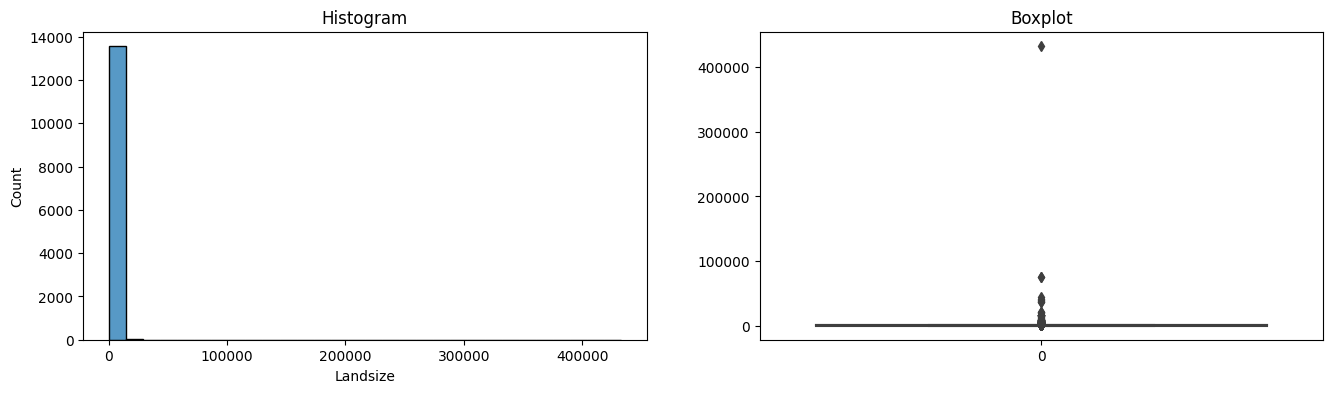

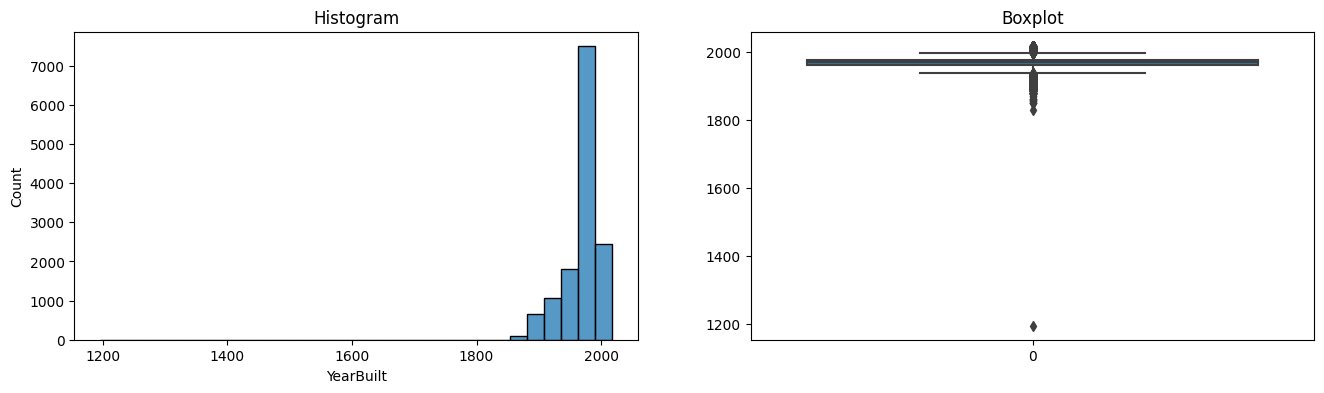

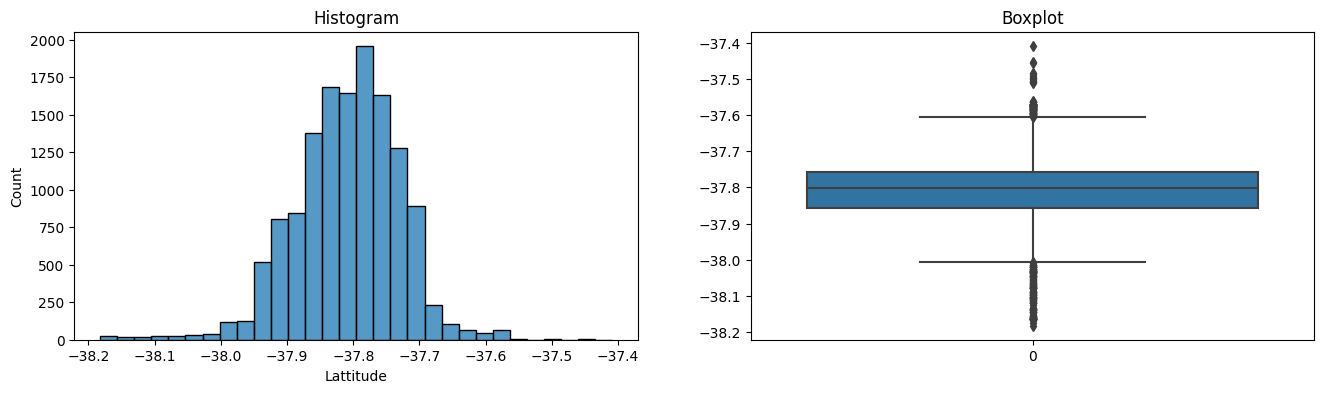

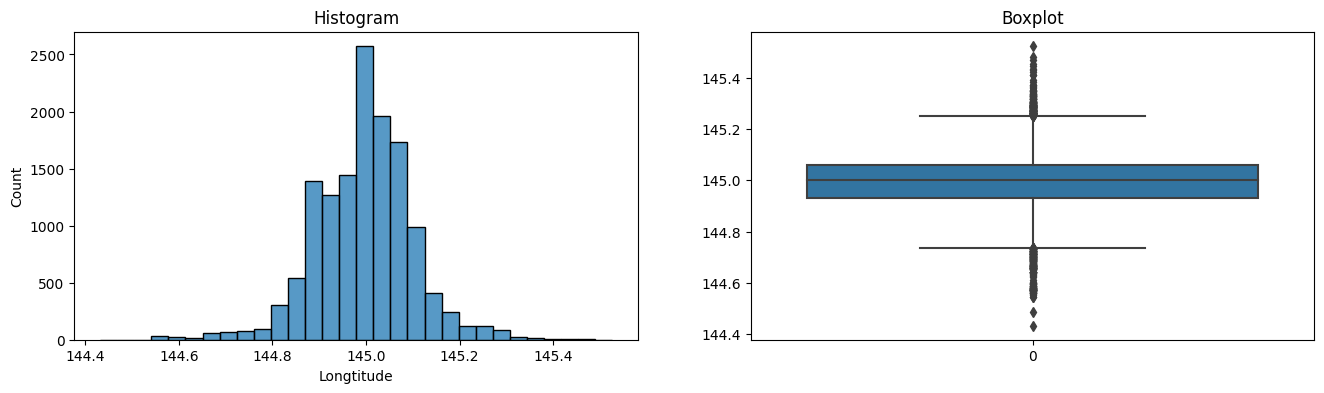

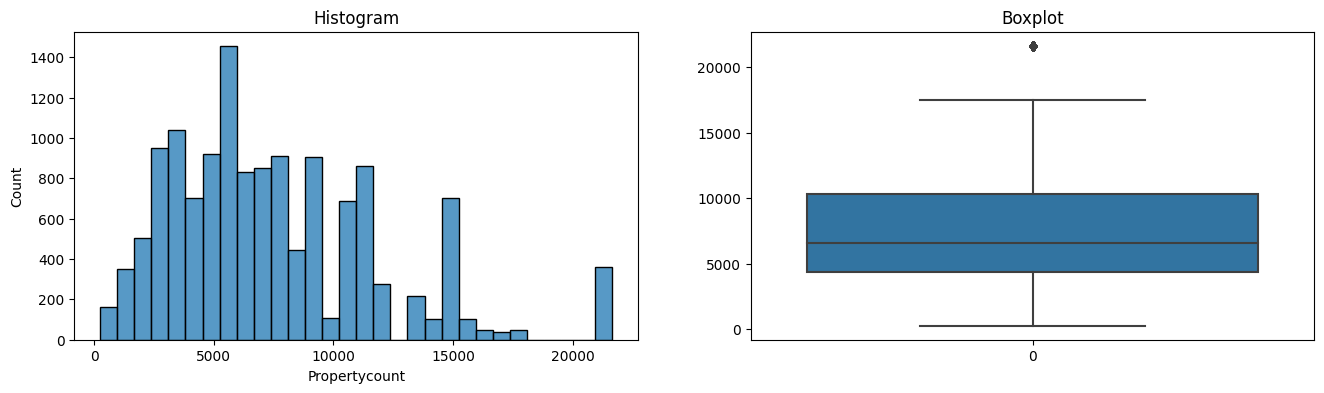

In [61]:
# melihat setiap kolom untuk mencari outlier menggunakan boxplot dan histogram
import matplotlib.pyplot as plt
import seaborn as sns

for col in numcols.columns:
  plt.figure(figsize=(16,4))

  plt.subplot(1,2,1)
  sns.histplot(df[col],bins = 30)
  plt.title('Histogram')

  plt.subplot(1,2,2)
  sns.boxplot(df[col])
  plt.title('Boxplot')

  plt.show()

Dari plot boxplot diatas bisa dilihat pada kolom 'Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount' terdapat outlier. Jadi Akan ditangani Dengan Quartile

In [62]:
# membuat list untuk kolo yang memiliki outliers
outlier_cols = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount']

# handling outlier
for cols in outlier_cols:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    df.loc[df[cols] < lower_boundary,cols] = lower_boundary
    df.loc[df[cols] > upper_boundary,cols] = upper_boundary

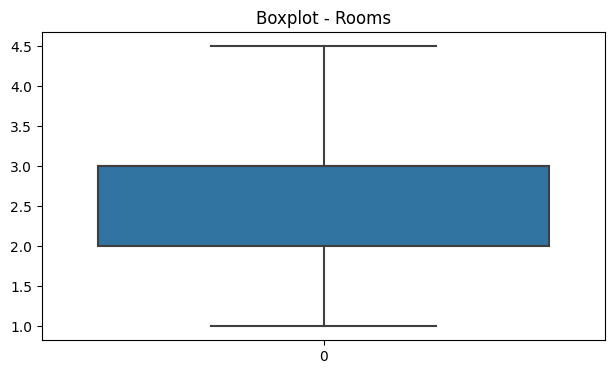

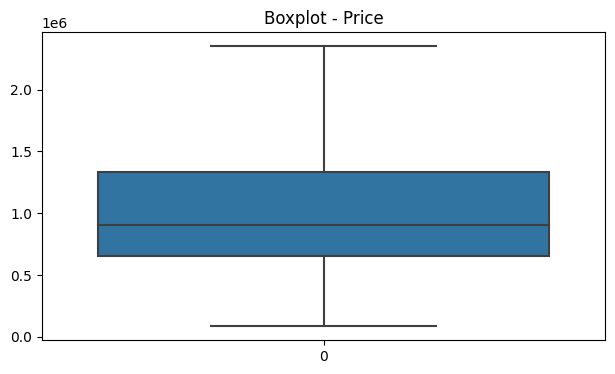

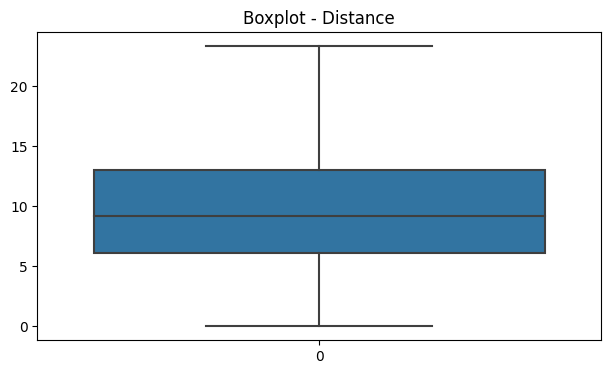

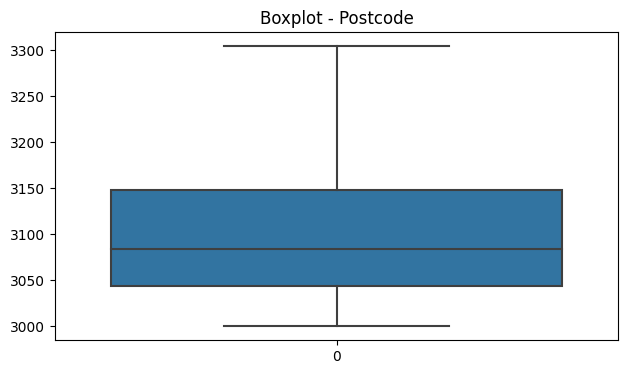

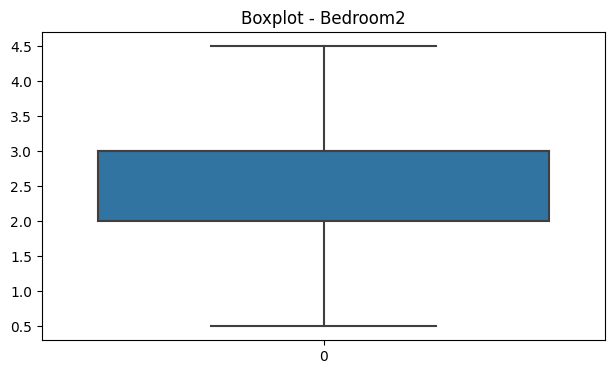

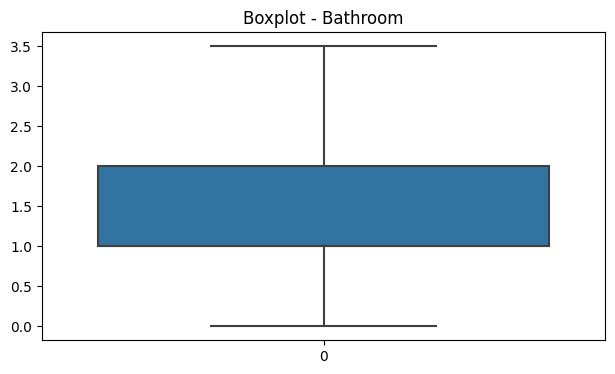

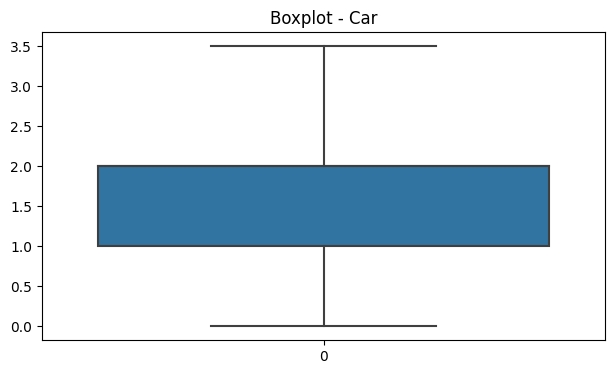

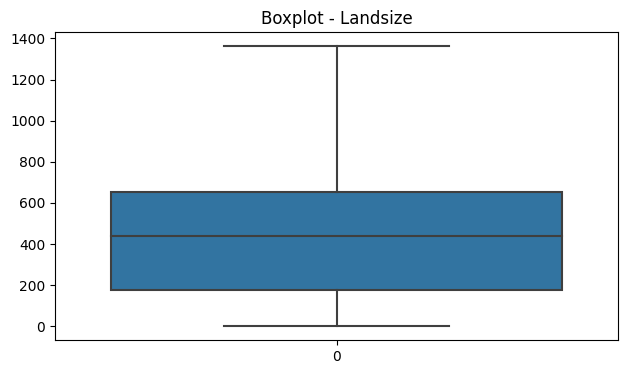

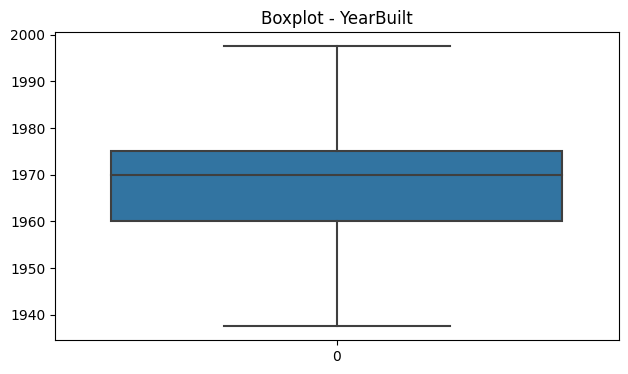

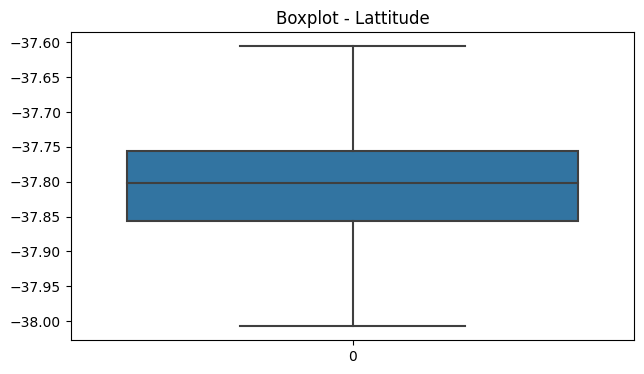

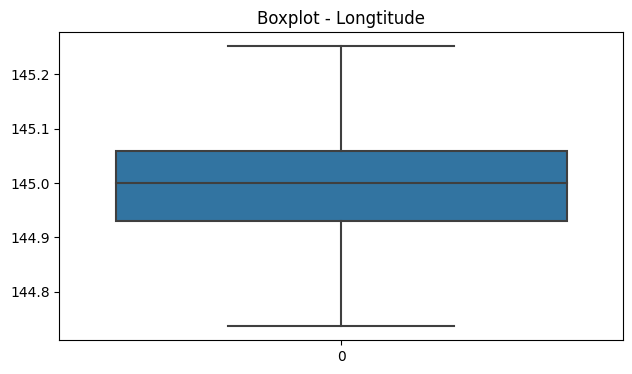

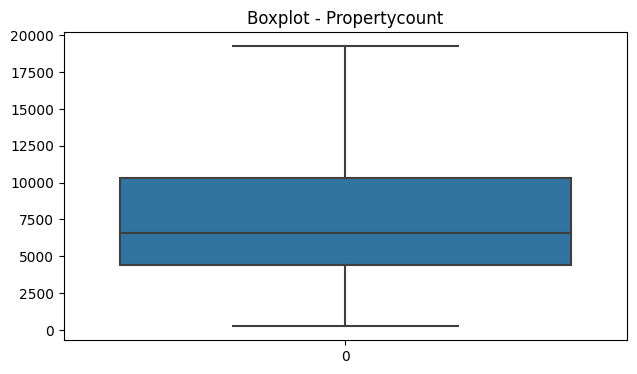

In [64]:
# mengecek kembali outlier menggunakan boxplot
for col in numcols.columns:
  plt.figure(figsize=(16,4))
  # Create boxplot
  plt.subplot(1, 2, 1)
  sns.boxplot(data=df[col])

    # Set title with column name
  plt.title(f'Boxplot - {col}')

  plt.show()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  float64       
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13580 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  YearBuilt      13580 non-null  float64       
 15  CouncilArea    1358

# 5. DESCRIPTIVE ANALYSIS
> Explore the data by doing descriptive analysis.
>
> Descriptive Statistics:
> - Compute and report central tendencies (mean, median, mode) for relevant columns.
> - Report dispersions (variance, standard deviation, range) for key numerical columns.
> - Analyze the distribution of key categorical variables, including counts and proportions.
>
> Visual Analysis (optional):
> - Use histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

# 6. SUMMARY (Visualisasi)
> Summarize the analysis process:
> - Highlight key findings from the descriptive analysis.
> - Highlight any challenges encountered during the analysis and how they were addressed. (optional)
> - Provide potential insights or observations based on the analysis. (optional)


In [69]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.904345,1.044248e+06,9.907095,3100.613844,2.882216,1.525147,1.569440,440.496760,1969.003203,-37.808513,144.995784,7391.169404
std,0.878101,5.271031e+05,5.056691,64.621694,0.877309,0.654940,0.827242,323.146283,18.197664,0.075242,0.098068,4186.107226
min,1.000000,8.500000e+04,0.000000,3000.000000,0.500000,0.000000,0.000000,0.000000,1937.500000,-38.007456,144.736542,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,1960.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,1975.000000,-37.756400,145.058305,10331.000000
max,4.500000,2.350000e+06,23.350000,3304.000000,4.500000,3.500000,3.500000,1362.000000,1997.500000,-37.605766,145.251363,19257.500000


In [70]:
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print('\n' + '-'*50 + '\n')  # Membuat pemisah antar kolom

Value counts for Suburb:
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

--------------------------------------------------

Value counts for Address:
36 Aberfeldie St    3
2 Bruce St          3
5 Charles St        3
53 William St       3
14 Arthur St        3
                   ..
16 Alleford St      1
2/1073 Centre Rd    1
14 Columbia St      1
21 Hardy Ct         1
6 Agnes St          1
Name: Address, Length: 13378, dtype: int64

--------------------------------------------------

Value counts for Rooms:
3.0    5881
2.0    3648
4.0    2688
4.5     682
1.0     681
Name: Rooms, dtype: int64

--------------------------------------------------

Value counts for Type:
h    9449
u    3017
t    1114
Name: Type, dtype: int64

----------------------------------

### SUMMARY (Visualisasi)

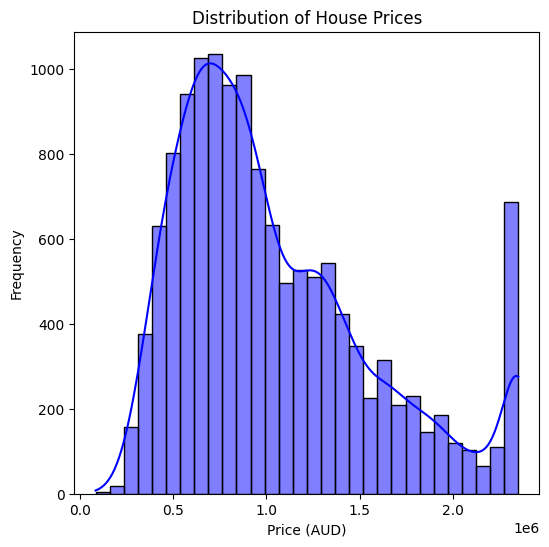

In [71]:
# Histogram for Price distribution
plt.figure(figsize=(6, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price (AUD)')
plt.ylabel('Frequency')
plt.show()

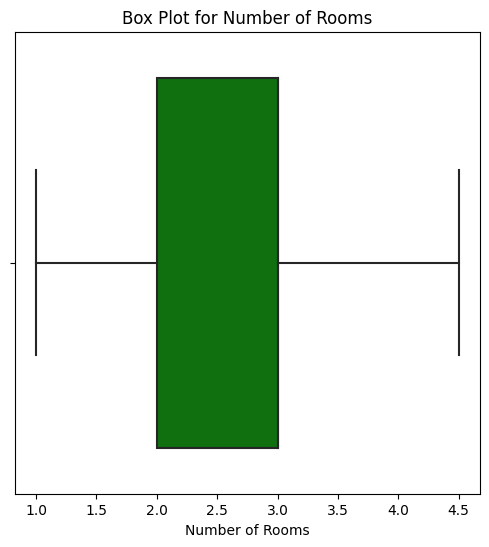

In [72]:
# Box plot for the number of rooms
plt.figure(figsize=(6, 6))
sns.boxplot(x='Rooms', data=df, color='green')
plt.title('Box Plot for Number of Rooms')
plt.xlabel('Number of Rooms')
plt.show()

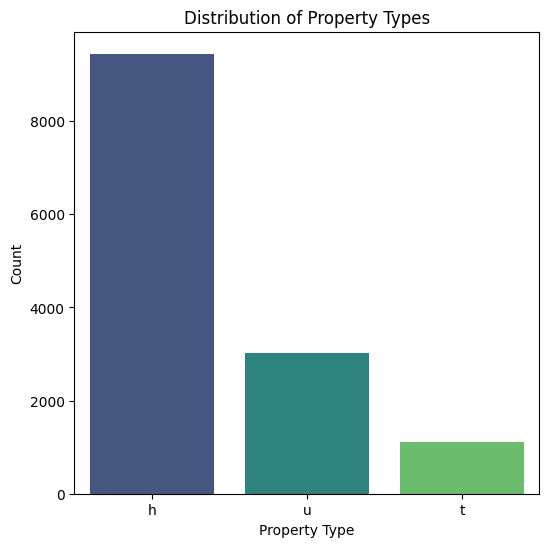

In [73]:
# Bar chart for property types
plt.figure(figsize=(6, 6))
sns.countplot(x='Type', data=df, palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

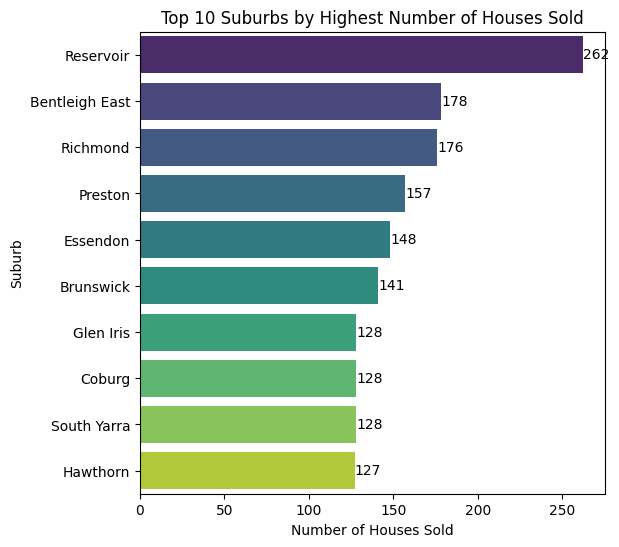

In [74]:
df_s_method = df[df['Method'] == 'S']

suburb_stats = df_s_method.groupby('Suburb').agg({'Address': 'count'}).reset_index()
top_suburbs_sold_s_method = suburb_stats.sort_values(by='Address', ascending=False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x='Address', y='Suburb', data=top_suburbs_sold_s_method, palette='viridis')
plt.title('Top 10 Suburbs by Highest Number of Houses Sold')
plt.xlabel('Number of Houses Sold')
plt.ylabel('Suburb')

for index, value in enumerate(top_suburbs_sold_s_method['Address']):
    plt.text(value + 0.1, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.show()

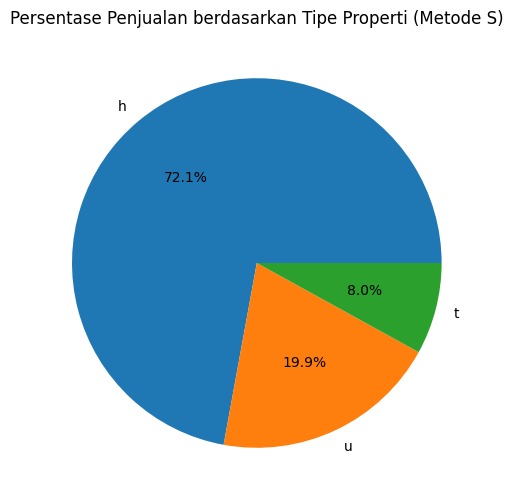

In [75]:
df_s_method = df[df['Method'] == 'S']

plt.figure(figsize=(6, 6))
df_s_method['Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Persentase Penjualan berdasarkan Tipe Properti (Metode S)')
plt.ylabel('')  # Menghilangkan label sumbu Y yang tidak diperlukan
plt.show()

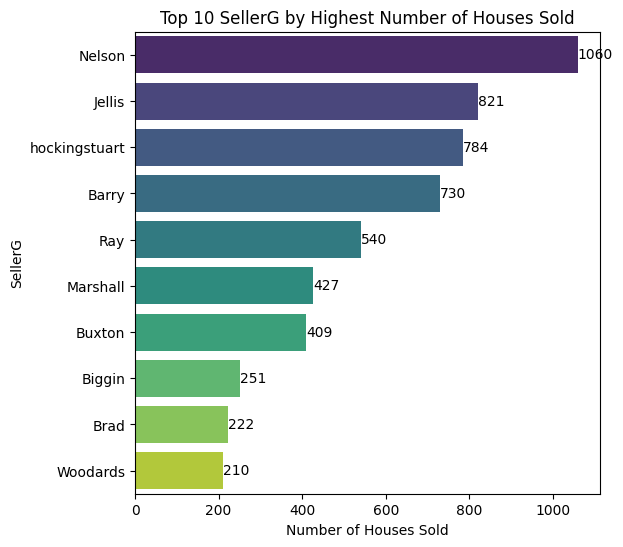

In [76]:
df_s_method = df[df['Method'] == 'S']

suburb_stats = df_s_method.groupby('SellerG').agg({'Address': 'count'}).reset_index()
top_suburbs_sold_s_method = suburb_stats.sort_values(by='Address', ascending=False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x='Address', y='SellerG', data=top_suburbs_sold_s_method, palette='viridis')
plt.title('Top 10 SellerG by Highest Number of Houses Sold')
plt.xlabel('Number of Houses Sold')
plt.ylabel('SellerG')

for index, value in enumerate(top_suburbs_sold_s_method['Address']):
    plt.text(value + 0.1, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.show()

### 7. EXPORT THE CLEANED DATA
> - Export the cleaned data to a CSV file.
>
> - Ensure that the data is formatted correctly for Google Sheets import.

In [77]:
df.to_csv('fix_dataset_miniproject.csv', index=False)